# Green patents issuance correlation with extreme weather events

In [16]:
# %pip install xlrd
# %pip isntall openpyxl

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from IPython.display import display

# DATA IMPORT

In [27]:
#Import country (https://www.briq-institute.org/global-preferences/downloads)
count = pd.read_stata("country.dta")

#Import extreme weather event dataset ()
cata = pd.read_excel("elephant_emdat_custom.xlsx")

#Import Patents datasets from OECD (https://stats.oecd.org/ --> Science, Technology and Patents/Patents Statistics/Patents by technology/Patents in environment-related technologies"
patent = pd.read_csv("PATS_IPC_25102023222244840.csv")
patents_PCT = pd.read_csv("applications PCT.csv")

In [32]:
#102 countries
# len(patents_PCT["Country"].unique())

102

In [17]:
#Import GDP per Cap
GDPCap =  pd.read_excel("GDPperCAP_WB.xls")

In [18]:
#import net FDI (foreign direct investment) inflows as a share of GDP
FDI = pd.read_csv("net FDI inflows.csv")

In [21]:
#import climate worriness dataset
climate_awareness = pd.read_excel("climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [22]:
#human development index
HDI =  pd.read_excel("HDR21-22_Statistical_Annex_HDI_Table.xlsx")

In [ ]:
#import Education

In [23]:
#import governement information
government = pd.read_csv("dd492d4b-981b-41c4-9e4a-5ea2e92d4ed4_Data.csv")

#DATA CLEAN

#Patience


In [ ]:
#see what in the patience dataset
count.columns

Index(['country', 'isocode', 'patience', 'risktaking', 'posrecip', 'negrecip',
       'altruism', 'trust'],
      dtype='object')

In [ ]:
# count.head()

,country,isocode,patience,risktaking,posrecip,negrecip,altruism,trust
0,Afghanistan,AFG,-0.201360,0.120764,0.289641,0.254712,0.166455,0.315964
1,Algeria,DZA,0.059815,0.391530,-0.598255,0.254901,-0.009968,-0.177371
2,Argentina,ARG,-0.229308,0.041503,0.159679,-0.140457,0.027347,-0.206733
3,Australia,AUS,0.657004,0.137137,0.069660,0.022190,0.155331,0.298973
4,Austria,AUT,0.608285,-0.061829,0.161047,-0.055415,-0.035363,0.154628


#Patent

In [ ]:
patent_2.head()

,KINDPATENT,Patent office,KINDREGION,Reference region,REGIONS,Regions,TECHNO,Total patents and by technologies,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,CA4603,Division 3 - MB,TOTAL_SHARE,Share of region in country's total patents,1998,1998,PC,Percentage,0,Units,NaN,NaN,0.0429,NaN,NaN
1,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,CA4603,Division 3 - MB,TOTAL_SHARE,Share of region in country's total patents,1999,1999,PC,Percentage,0,Units,NaN,NaN,0.0073,NaN,NaN
2,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,CA4603,Division 3 - MB,TOTAL_SHARE,Share of region in country's total patents,2000,2000,PC,Percentage,0,Units,NaN,NaN,0.0000,NaN,NaN
3,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,CA4603,Division 3 - MB,TOTAL_SHARE,Share of region in country's total patents,2001,2001,PC,Percentage,0,Units,NaN,NaN,0.0589,NaN,NaN
4,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,CA4603,Division 3 - MB,TOTAL_SHARE,Share of region in country's total patents,2002,2002,PC,Percentage,0,Units,NaN,NaN,0.0546,NaN,NaN


In [ ]:
#first check for patent
patent.describe()
patent.columns
patent.head(20)

,KINDPATENT,Patents Office & Patents Families,KINDCOUNTRY,Reference country,LOCATION,Country,IPC,Technology domains & IPC,KINDDATE,Reference Date,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,1999,NBR,Number,0,Units,NaN,NaN,971.1999,NaN,NaN
1,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2000,NBR,Number,0,Units,NaN,NaN,1032.6253,NaN,NaN
2,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2001,NBR,Number,0,Units,NaN,NaN,986.7165,NaN,NaN
3,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2002,NBR,Number,0,Units,NaN,NaN,1058.1548,NaN,NaN
4,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2003,NBR,Number,0,Units,NaN,NaN,1093.6167,NaN,NaN
5,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2004,NBR,Number,0,Units,NaN,NaN,1172.3429,NaN,NaN
6,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2005,NBR,Number,0,Units,NaN,NaN,1170.2468,NaN,NaN
7,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2006,NBR,Number,0,Units,NaN,NaN,1045.3617,NaN,NaN
8,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2007,NBR,Number,0,Units,NaN,NaN,984.0527,NaN,NaN
9,EPO_A,Patent applications to the EPO,INVENTORS,Inventor(s)'s country(ies) of residence,AUS,Australia,TOTAL,Total Patents,PRIORITY,Priority date,...,2008,NBR,Number,0,Units,NaN,NaN,969.0851,NaN,NaN


In [ ]:
#Check the number iof different patent
patent['IPC'].unique()

array(['TOTAL', 'BUILD', 'ENE', 'GHG', 'MAN', 'TRA', 'ENV_TECH', 'GOODS',
       'WAT_WASTE'], dtype=object)

In [ ]:
# Select only the columns you need so the env patent
patents = patent[["Country", "Value", "Time", 'IPC', 'KINDDATE', 'KINDCOUNTRY', 'Patents Office & Patents Families']]

# Filter the data based on conditions
new_pat = patents[(patents['IPC'] == "ENV_TECH") &
                     (patents['KINDDATE'] == "PRIORITY") & (patents['KINDCOUNTRY'] == "INVENTORS")
                     & (patents['Patents Office & Patents Families'] == "Patent applications to the EPO")]

# Drop unnecessary columns
new_pat = new_pat.drop(columns=["KINDDATE",  "Patents Office & Patents Families", "KINDCOUNTRY"])

# Rename columns
new_pat = new_pat.rename(columns={"Value": "patents_number"})

# Convert 'country' column to lowercase
new_pat['Country'] = new_pat['Country'].str.lower()
new_pat.Country = new_pat['Country'].astype('object')
new_pat.head()

,Country,patents_number,Time,IPC
165652,denmark,94.6167,1999,ENV_TECH
165653,denmark,95.6619,2000,ENV_TECH
165654,denmark,85.1917,2001,ENV_TECH
165655,denmark,97.5833,2002,ENV_TECH
165656,denmark,111.1603,2003,ENV_TECH


In [ ]:
#get rid of the 1999 year to merge with catasrophy
pat20 = new_pat[new_pat['Time'] != 1999]
pat20.Time.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
new_pat['IPC'].count()

1298

In [ ]:
new_pat.dtypes

Country            object
patents_number    float64
Time                int64
IPC                object
dtype: object

#Catastrophy

In [ ]:
#let's play with the catastrophy dataset
cata.describe()

,AID Contribution ('000 US$),Magnitude,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,...,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
count,4.810000e+02,3.315000e+03,1804.000000,1804.000000,9781.000000,9712.000000,8356.000000,9781.000000,9622.000000,8418.000000,...,6.386000e+03,1.205000e+03,7.876000e+03,3.000000e+01,2.700000e+01,6.880000e+02,6.810000e+02,3.025000e+03,2.983000e+03,9504.000000
mean,2.894168e+04,4.910028e+04,16.436270,41.770847,2010.939679,6.387150,15.150072,2010.989163,6.581376,15.870634,...,7.013751e+05,3.384869e+04,5.747689e+05,6.149345e+06,3.245456e+06,1.299015e+06,1.632017e+06,1.101577e+06,1.385305e+06,75.598285
std,2.136265e+05,2.798597e+05,21.799873,75.570844,7.035249,3.382679,9.043017,7.036850,3.346649,8.913669,...,7.182814e+06,2.246830e+05,6.475121e+06,1.826331e+07,5.030913e+06,4.603440e+06,5.769464e+06,6.290534e+06,8.085126e+06,11.036263
min,3.000000e+00,-5.700000e+01,-72.640000,-172.095000,2000.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,...,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,1.260000e+02,3.400000e+01,4.600000e+01,0.000000e+00,0.000000e+00,58.840648
25%,1.610000e+02,7.700000e+00,1.061500,-0.315000,2005.000000,4.000000,7.000000,2005.000000,4.000000,8.000000,...,1.071750e+03,3.500000e+02,6.000000e+02,1.068870e+05,1.391450e+05,7.225000e+04,9.394800e+04,1.500000e+04,2.033900e+04,66.731058
50%,7.610000e+02,1.990000e+02,18.550000,53.950500,2010.000000,7.000000,15.000000,2011.000000,7.000000,16.000000,...,9.412000e+03,1.995000e+03,5.046000e+03,5.515000e+05,6.745680e+05,2.460000e+05,3.305590e+05,1.000000e+05,1.306550e+05,74.509444
75%,5.018000e+03,2.173700e+04,34.786750,103.012750,2017.000000,9.000000,23.000000,2017.000000,9.000000,24.000000,...,7.545450e+04,8.000000e+03,5.000000e+04,4.736000e+06,3.106949e+06,8.000000e+05,1.040832e+06,5.000000e+05,6.710560e+05,83.757255
max,3.518530e+06,1.302587e+07,67.930000,179.650000,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,...,3.300000e+08,5.000000e+06,3.300000e+08,1.000000e+08,1.543428e+07,6.000000e+07,8.991316e+07,2.100000e+08,2.732184e+08,100.000000


In [ ]:
#Select only the columns you need in the dataset
catastrophy = cata[["Country", "Disaster Type", 'Start Year', 'Total Deaths', "Total Damage, Adjusted ('000 US$)"]]
catastrophy.head(20)

,Country,Disaster Type,Start Year,Total Deaths,"Total Damage, Adjusted ('000 US$)"
0,Djibouti,Drought,2001,NaN,NaN
1,Sudan,Drought,2000,NaN,NaN
2,Somalia,Drought,2000,21.0,NaN
3,Angola,Flood,2000,31.0,16995.0
4,Bangladesh,Extreme temperature,2000,49.0,NaN
5,Guatemala,Volcanic activity,2000,NaN,NaN
6,Iran (Islamic Republic of),Storm,2000,3.0,NaN
7,Mozambique,Flood,2000,800.0,712433.0
8,South Africa,Wildfire,2000,NaN,16995.0
9,Brazil,Flood,2000,26.0,NaN


In [ ]:
#drop line empty to focus only on extreme events
catastrophy_complete1 = catastrophy.dropna(subset=["Total Damage, Adjusted ('000 US$)"])
catastrophy_complete2 = catastrophy_complete1.dropna(subset=['Total Deaths'])
print(catastrophy_complete2)

                       Country Disaster Type  Start Year  Total Deaths  \
3                       Angola         Flood        2000          31.0   
7                   Mozambique         Flood        2000         800.0   
11    United States of America         Storm        2000           1.0   
15                       China    Earthquake        2000           7.0   
16                       China    Earthquake        2000           1.0   
...                        ...           ...         ...           ...   
9462  United States of America         Storm        2022           3.0   
9465                    Canada         Storm        2022           4.0   
9466  United States of America         Storm        2022          98.0   
9472               Philippines         Flood        2022          70.0   
9483  United States of America       Drought        2022         136.0   

      Total Damage, Adjusted ('000 US$)  
3                               16995.0  
7                          

In [ ]:
#to get rid of the 2021 and 2022 years to merge with patent
Cata20 = catastrophy_complete2[(catastrophy_complete2['Start Year'] != 2021) & (catastrophy_complete2['Start Year'] != 2022)]
Cata20['Start Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
#control all the value in Disaster Type
unique_disaster_types = catastrophy_complete2['Disaster Type'].unique()
print(unique_disaster_types)

['Flood' 'Storm' 'Earthquake' 'Mass movement (wet)' 'Extreme temperature'
 'Wildfire' 'Drought' 'Volcanic activity' 'Mass movement (dry)'
 'Glacial lake outburst flood']


In [ ]:
#keep only the value that we want to study in the data set
cata_keep = ['Drought', 'Flood', 'Storm', 'Earthquake','Volcanic activity']

#cata_keep = [x.lower() for x in cata_keep]

catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]

Cata20['Disaster Type'] = Cata20['Disaster Type'].str.lower()
catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]

catastrophy_complete_filt['Disaster Type'].unique()
catastrophy_complete_filt['Start Year'].unique()

#convert country in lower letters
catastrophy_complete_filt['Country'] = catastrophy_complete_filt['Country'].str.lower()
catastrophy_complete_filt['Country'].unique()

catastrophy_complete_filt.rename(columns={'Start Year': 'Year'}, inplace=True)

<ipython-input-13-e8fad28c80f6>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]
<ipython-input-13-e8fad28c80f6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cata20['Disaster Type'] = Cata20['Disaster Type'].str.lower()
<ipython-input-13-e8fad28c80f6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]
<ipython-input-13-e8fad28c80f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
#control if the remaining value are only the one we need
unique_disaster_types2 = catastrophy_complete_filt['Disaster Type'].unique()
print(unique_disaster_types2)

['flood' 'storm' 'earthquake' 'drought' 'volcanic activity']


In [ ]:
#let's have a look to what is behind the new data
catastrophy_complete_filt.describe()

,Year,Total Deaths,"Total Damage, Adjusted ('000 US$)"
count,2044.000000,2044.000000,2.044000e+03
mean,2010.084149,478.281311,1.543544e+06
std,6.027654,7408.489341,9.199869e+06
min,2000.000000,1.000000,0.000000e+00
25%,2005.000000,4.000000,2.044525e+04
50%,2010.000000,13.000000,1.401090e+05
75%,2015.000000,42.000000,7.078452e+05
max,2020.000000,222570.000000,2.732184e+08


In [ ]:
#let's have only the value above the median because the distirbution is skwed when comparing mean and median
#we check the number of country above the median
#we take above the median to only have extreme events

cata_above_mediane = catastrophy_complete_filt[catastrophy_complete_filt['Total Deaths'] > catastrophy_complete_filt['Total Deaths'].median()]

#print(f"Nombre de valeurs au-dessus de la moyenne : {count_above_mean}")
print(cata_above_mediane["Country"].unique())

cata_above_mediane.head(30)


['angola' 'mozambique' 'philippines' 'south africa' 'zimbabwe'
 'madagascar' 'china' 'indonesia' 'chile' 'viet nam' 'cambodia' 'india'
 'thailand' 'nepal' 'taiwan (province of china)' 'republic of korea'
 "democratic people's republic of korea"
 "lao people's democratic republic" 'japan' 'bangladesh' 'belize' 'mexico'
 'italy' 'azerbaijan' 'afghanistan' 'el salvador' 'malawi'
 'bolivia (plurinational state of)' 'argentina' 'united states of america'
 'peru' 'iran (islamic republic of)' 'pakistan' 'poland'
 'russian federation' 'nigeria' 'chad' 'honduras' 'nicaragua' 'algeria'
 'morocco' 'brazil' 'guatemala' 'senegal'
 'democratic republic of the congo' 'türkiye' 'ecuador' 'canary islands'
 'haiti' 'micronesia (federated states of)' 'germany' 'tajikistan'
 'czechia' 'france' 'fiji' 'oman' 'sri lanka' 'mongolia' 'sudan' 'myanmar'
 'grenada' 'jamaica' 'maldives' 'malaysia' 'somalia' 'guyana'
 'venezuela (bolivarian republic of)' 'colombia' 'ethiopia' 'bulgaria'
 'cuba' 'romania' 'uganda' 

,Country,Disaster Type,Year,Total Deaths,"Total Damage, Adjusted ('000 US$)"
3,angola,flood,2000,31.0,16995.0
7,mozambique,flood,2000,800.0,712433.0
18,philippines,flood,2000,50.0,6934.0
20,south africa,flood,2000,83.0,271921.0
44,zimbabwe,flood,2000,70.0,123894.0
56,madagascar,storm,2000,130.0,15296.0
57,mozambique,storm,2000,17.0,1700.0
103,china,flood,2000,15.0,20394.0
116,indonesia,earthquake,2000,45.0,50985.0
129,indonesia,flood,2000,126.0,134261.0


##Play with the data not useful for merging

In [ ]:
#tester de grouper par pays
grouped_pays = catastrophy_complete_filt.groupby('Country', as_index=False).sum()
grouped_pays.head(30)

<ipython-input-22-0a1c9f6dbce5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_pays = catastrophy_complete_filt.groupby('Country', as_index=False).sum()


,Country,Year,Total Deaths,"Total Damage, Adjusted ('000 US$)"
0,afghanistan,10033,418.0,38644.0
1,albania,6038,53.0,840398.0
2,algeria,18050,3361.0,10012588.0
3,american samoa,2003,6.0,79544.0
4,angola,4017,42.0,19383.0
5,anguilla,2017,4.0,238785.0
6,antigua and barbuda,2017,1.0,298482.0
7,argentina,22104,136.0,4640095.0
8,australia,62283,126.0,32203933.0
9,austria,14056,27.0,7311503.0


In [ ]:
catastrophy_complete_filt.dtypes

Country                               object
Disaster Type                         object
Year                                   int64
Total Deaths                         float64
Total Damage, Adjusted ('000 US$)    float64
dtype: object

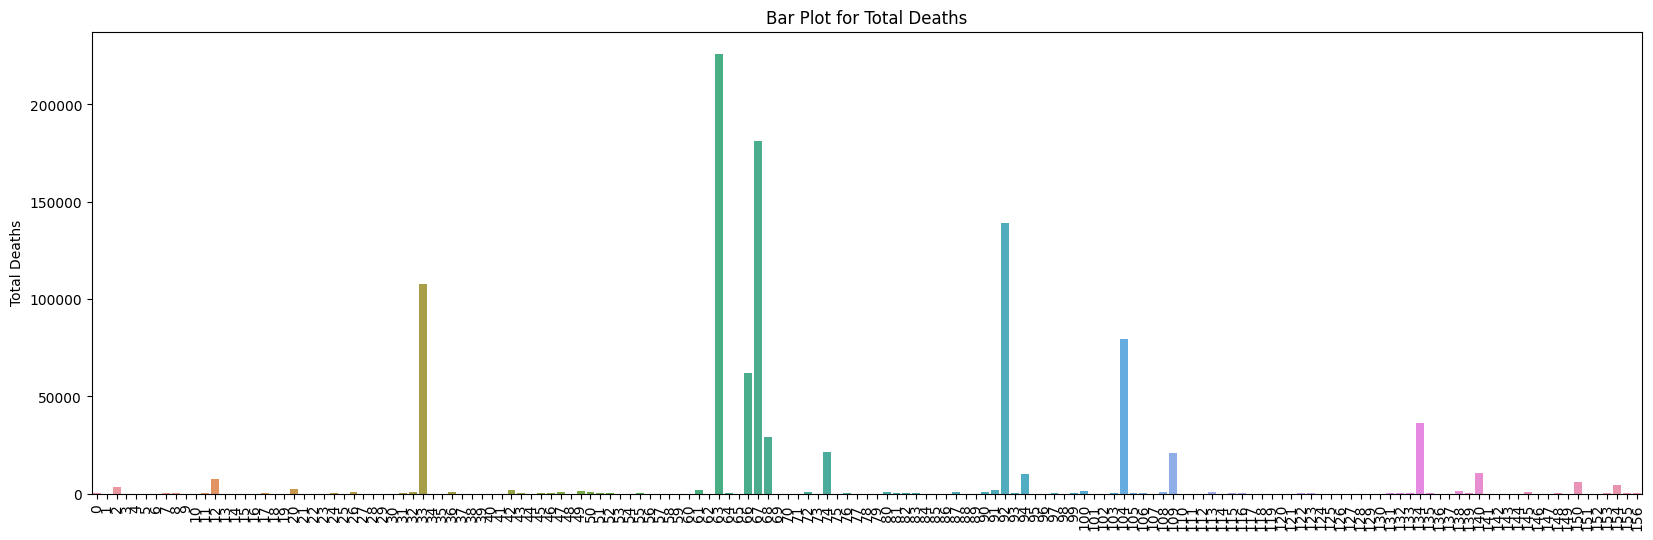

In [ ]:
#test with a bar plot how distirbuted it is regarding the death rate
plt.figure(figsize=(20, 6))
sns.barplot(x=grouped_pays.index, y='Total Deaths', data=grouped_pays)

plt.xlabel('')
plt.ylabel('Total Deaths')
plt.title('Bar Plot for Total Deaths')
plt.xticks(rotation=90)

plt.show()

In [ ]:
catastrophy_complete_filt['Start Year'] = catastrophy_complete_filt['Start Year'].astype('int')

KeyError: ignored

In [ ]:
catastrophy_complete_filt.dtypes

In [ ]:
#test regarding the years
grouped_years = catastrophy_complete_filt.groupby('Start Year', as_index=False).sum()
grouped_years.head(30)

In [ ]:
grouped_years.columns

In [ ]:
#test with a bar plot how distirbuted it is regarding the years
plt.figure(figsize=(20, 6))
sns.barplot(x=grouped_years['Start Year'], y='Total Deaths', data=grouped_years)

plt.xlabel('Start Year')
plt.ylabel('Total Deaths')
plt.title('Bar Plot for Start Year')

plt.show()

#Graphe analysis
#In 2004, one of the deadliest natural disasters in recorded history occurred: the Indian Ocean tsunami on December 26. Triggered by a massive undersea earthquake off the coast of Sumatra, Indonesia, the tsunami resulted in the loss of approximately 230,000 to 280,000 lives across several countries in the Indian Ocean region.

#In 2008, there were several significant natural disasters that caused substantial damage, but in terms of high casualties, one of the notable events was the Sichuan earthquake in China on May 12. This earthquake, with a magnitude of 7.9, resulted in around 87,000 casualties, with many more injured and millions displaced.

#In 2010, one of the major catastrophes was the Haiti earthquake on January 12. The earthquake, with a magnitude of 7.0, devastated the capital city of Port-au-Prince and surrounding areas, causing widespread destruction and leading to an estimated 230,000 deaths.


In [ ]:
#let's now check the impact on only major events influenced by human
cata_human = ['Drought', 'Flood', 'Storm']

cata_human = [x.lower() for x in cata_human]

catastrophy_human_filt = catastrophy_complete_filt[catastrophy_complete_filt['Disaster Type'].isin(cata_human)]

catastrophy_human_filt.head(20)
#catastrophy_human_filt['Start Year'].unique()

In [ ]:
#Again let's groupby countries
grouped_payshuman = catastrophy_human_filt.groupby('Country', as_index=False).sum()
grouped_payshuman.head(30)

In [ ]:
#test with a bar plot how distirbuted it is regarding the death rate
plt.figure(figsize=(20, 6))
sns.barplot(x=grouped_payshuman.index, y='Total Deaths', data=grouped_payshuman)

plt.xlabel('')
plt.ylabel('Total Deaths')
plt.title('Bar Plot for Total Deaths')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#test regarding the years
grouped_yearshuman = catastrophy_human_filt.groupby('Start Year', as_index=False).sum()
grouped_yearshuman.head(30)

In [ ]:
#test with a bar plot how distirbuted it is regarding the years
plt.figure(figsize=(20, 6))
sns.barplot(x=grouped_yearshuman['Start Year'], y='Total Deaths', data=grouped_yearshuman)

plt.xlabel('Start Year')
plt.ylabel('Total Deaths')
plt.title('Bar Plot for Start Year')

#interpretation
#In 2008, Myanmar (formerly known as Burma) experienced a devastating natural disaster known as Cyclone Nargis. On May 2nd and 3rd, Cyclone Nargis made landfall in the Irrawaddy Delta region, which is a densely populated area in Myanmar. The cyclone brought extremely powerful winds, heavy rainfall, and a storm surge that inundated low-lying areas.
#Cyclone Nargis caused widespread destruction, resulting in significant loss of life and devastating infrastructure damage. The official death toll reported by the Myanmar government was around 138,000 people, with many more missing or displaced. However, independent assessments suggested that the actual death toll might have been significantly higher.

#GDP

In [ ]:
#Cleaning GDP DS
GDPCap.columns = GDPCap.iloc[2]  #define the line 3 as name of the column
GDPC = GDPCap.iloc[3:]
GDPC.head(10)

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
6,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
7,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
8,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.063397,4578.633208,3952.803584,4124.055390,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519
9,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,44747.753864,45680.534990,38885.530324,39931.216982,40632.231554,42904.828456,41328.600499,37207.222000,42072.341103,41992.793358
10,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7348.849550,7302.250350,6283.256026,6113.397738,6224.522970,6573.816970,6498.529037,5639.398735,6414.725618,7655.848402
11,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,45729.607676,46865.964598,41525.138904,41054.539570,43063.967479,46722.268719,45376.170839,37629.174168,44315.554184,53757.863251
12,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1163.186836,855.275656,1179.504098,1285.260799,...,13080.254732,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231,8496.428157,10636.115530,13686.008674


In [ ]:
#only keeping the value after 2000 to 2020
col_keep = list(range(0, 2)) + list(range(44, 65))

DGPCap_clean = GDPC.iloc[:, col_keep]
DGPCap_clean.head(10)

2,Country Name,Country Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,21023.157513,20913.299497,21377.095185,22050.830932,24104.646177,24975.673257,25833.445623,27665.426465,...,26044.435933,25609.955724,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569
4,Africa Eastern and Southern,AFE,709.061010,630.198869,630.479082,816.437662,989.220845,1124.220303,1230.194793,1374.086248,...,1799.623009,1765.250073,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527
5,Afghanistan,AFG,NaN,NaN,183.532775,200.462376,221.657662,255.055107,274.000656,375.078261,...,621.912414,663.141053,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797
6,Africa Western and Central,AFW,522.772772,535.897917,621.862505,700.443384,843.989814,1003.436618,1245.822948,1420.840336,...,1860.943928,1957.519614,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899
7,Angola,AGO,556.884244,527.464118,872.657638,982.805590,1254.696126,1900.723817,2597.963585,3121.348735,...,4511.153227,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754
8,Albania,ALB,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.787803,2972.743618,3595.038302,...,4437.141146,4247.631356,4413.063397,4578.633208,3952.803584,4124.055390,4531.032207,5287.660817,5396.214227,5343.037704
9,Andorra,AND,21620.468488,22809.087760,24784.963786,31954.155656,37630.764264,39583.931194,43084.292912,50562.861207,...,51428.196955,44902.380765,44747.753864,45680.534990,38885.530324,39931.216982,40632.231554,42904.828456,41328.600499,37207.222000
10,Arab World,ARB,2857.132721,2735.425402,2693.037779,2915.513683,3392.620162,4069.149413,4701.931138,5327.234547,...,6864.434184,7365.456849,7348.849550,7302.250350,6283.256026,6113.397738,6224.522970,6573.816970,6498.529037,5639.398735
11,United Arab Emirates,ARE,31855.500605,29909.009435,30221.967000,32607.372935,37017.736365,42190.554379,45339.585117,43918.380169,...,40893.023360,44386.786080,45729.607676,46865.964598,41525.138904,41054.539570,43063.967479,46722.268719,45376.170839,37629.174168
12,Argentina,ARG,7666.517834,7168.975872,2579.488769,3333.152904,4258.160261,5086.627761,5890.978002,7210.595548,...,12848.740476,13082.664326,13080.254732,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231,8496.428157


In [ ]:
#Get rid of useless columns and convert in small letters
GDP_filt = DGPCap_clean.drop(columns=["Country Code"])
GDP_filt.rename(columns={'Country Name': 'Country'}, inplace=True)
GDP_filt['Country'] = GDP_filt['Country'].str.lower()
GDP_filt.Country = GDP_filt.Country.astype('string')
GDP_filt.columns

Index(['Country',    2000.0,    2001.0,    2002.0,    2003.0,    2004.0,
          2005.0,    2006.0,    2007.0,    2008.0,    2009.0,    2010.0,
          2011.0,    2012.0,    2013.0,    2014.0,    2015.0,    2016.0,
          2017.0,    2018.0,    2019.0,    2020.0],
      dtype='object', name=2)

In [ ]:
# Data Restructuration
data = [['Country', 'Year', 'GDPCap']]

for index, row in GDP_filt.iterrows():
    pays = row['Country']
    for col in GDP_filt.columns[1:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays, annee, valeur])

# Create new dataframe with data Restructuration
gdp = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
gdp.reset_index(drop=True, inplace=True)

# Check the modified dataframe
gdp.head(50)

,Country,Year,GDPCap
0,aruba,2000,21023.157513
1,aruba,2001,20913.299497
2,aruba,2002,21377.095185
3,aruba,2003,22050.830932
4,aruba,2004,24104.646177
5,aruba,2005,24975.673257
6,aruba,2006,25833.445623
7,aruba,2007,27665.426465
8,aruba,2008,29011.559245
9,aruba,2009,25739.137251


In [ ]:
#Split country above and under the gdp mediane
keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] >= DGPCap_clean[2010.0].median()]
gdp_above = DGPCap_clean.loc[keep]
gdp_above = gdp_above['Country Name'].str.lower().astype('object').unique()
print(gdp_above)

print ('''

''')

keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] <= DGPCap_clean[2010.0].median()]
gdp_below = DGPCap_clean.loc[keep]
gdp_below = gdp_below['Country Name'].str.lower().astype('object').unique()
print(gdp_below)

['aruba' 'andorra' 'arab world' 'united arab emirates' 'argentina'
 'american samoa' 'antigua and barbuda' 'australia' 'austria' 'azerbaijan'
 'belgium' 'bulgaria' 'bahrain' 'bahamas, the' 'belarus' 'bermuda'
 'brazil' 'barbados' 'brunei darussalam' 'botswana' 'canada'
 'central europe and the baltics' 'switzerland' 'chile' 'colombia'
 'costa rica' 'caribbean small states' 'cayman islands' 'cyprus' 'czechia'
 'germany' 'dominica' 'denmark' 'dominican republic' 'east asia & pacific'
 'europe & central asia (excluding high income)' 'europe & central asia'
 'euro area' 'spain' 'estonia' 'european union' 'finland' 'france'
 'faroe islands' 'gabon' 'united kingdom' 'equatorial guinea' 'greece'
 'grenada' 'greenland' 'guam' 'high income' 'hong kong sar, china'
 'croatia' 'hungary' 'isle of man' 'ireland' 'iran, islamic rep.'
 'iceland' 'israel' 'italy' 'japan' 'kazakhstan' 'st. kitts and nevis'
 'korea, rep.' 'kuwait'
 'latin america & caribbean (excluding high income)' 'lebanon' 'libya'
 's

##Play with graphe and GDP

In [ ]:
#split country above and under the GDP mediane

keep = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] >= DGPCap_clean[2022.0].median()]
GDP_above = DGPCap_clean.loc[keep]
GDP_above.head(20)

#median = DGPCap_clean[2022.0].median()
#print(median)

In [ ]:
#take out all the country above the median
liste = GDP_above['Country Name'].unique()
list_above = liste.tolist()
Country_above_GDP = [x.lower() for x in list_above]
Country_above_GDP

In [ ]:
#testing the death in country above GDP

cata_count_above = grouped_payshuman[grouped_payshuman['Country'].isin(Country_above_GDP)]

cata_count_above.head(20)

In [ ]:
#test with a bar plot how distirbuted it is regarding the death rate for country above GDP
plt.figure(figsize=(20, 6))
sns.barplot(x=cata_count_above['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_above)

plt.xlabel('')
plt.ylabel("Total Damage ('000 US$)")
plt.title('Bar Plot for Total Deaths')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#split country below and under the GDP mediane

keep1 = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] <= DGPCap_clean[2022.0].median()]
GDP_below = DGPCap_clean.loc[keep1]
GDP_below.head(20)

In [ ]:
#take out all the country below the median
liste1 = GDP_below['Country Name'].unique()
list_below = liste1.tolist()
Country_below_GDP = [x.lower() for x in list_below]
Country_below_GDP

In [ ]:
#testing the death in country below GDP

cata_count_below = grouped_payshuman[grouped_payshuman['Country'].isin(Country_below_GDP)]

cata_count_below.head(20)

In [ ]:
#test with a bar plot how distirbuted it is regarding the death rate for country above GDP
plt.figure(figsize=(20, 6))
sns.barplot(x=cata_count_below['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_below)

plt.xlabel('')
plt.ylabel("Total Damage ('000 US$)")
plt.title('Bar Plot for Total Deaths')
plt.xticks(rotation=90)

plt.show()

#Merging cleaning Cata and Patent

In [ ]:
#Group the columns with catasrophy sample and keep all as columns

Catagrouped_above = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).agg({
    "Total Damage, Adjusted ('000 US$)": 'sum',
    'Total Deaths': 'sum'
}).reset_index()

#Seconde group to count the number of lines per group
count_per_group = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).size().reset_index(name='Count')

#Merge both results
Catagrouped_above = Catagrouped_above.merge(count_per_group, on=['Country', 'Disaster Type', 'Year'])

Catagrouped_above.head(60)

,Country,Disaster Type,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count
0,afghanistan,drought,2000,85.0,37.0,1
1,afghanistan,flood,2009,27282.0,39.0,1
2,afghanistan,flood,2014,3709.0,81.0,1
3,afghanistan,storm,2005,7493.0,260.0,1
4,albania,earthquake,2019,801300.0,51.0,1
5,algeria,earthquake,2003,7954379.0,2266.0,1
6,algeria,flood,2001,495838.0,921.0,1
7,algeria,flood,2002,2440.0,29.0,1
8,algeria,flood,2007,60779.0,40.0,2
9,algeria,flood,2008,473027.0,93.0,1


In [ ]:
#NOT USEFULL ANYMORE : create speparate dataframe for each catastrophy
drought_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'drought'].copy()
storm_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'storm'].copy()
flood_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'flood'].copy()
earthquake_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'earthquake'].copy()
Volcanic_activity_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'Volcanic activity'].copy()
print(flood_above)

In [ ]:
#check new dataframe are ok
nombre_drought = Catagrouped_above['Disaster Type'].value_counts()['flood']
print(nombre_drought)

In [ ]:
#Prepare dataframe to merge
pat20.loc[:, 'Country'] = pat20['Country'].astype('object')

<ipython-input-23-5b2b4201ac7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat20.loc[:, 'Country'] = pat20['Country'].astype('object')


In [ ]:
flood_above.dtypes
pat20.dtypes

In [ ]:
#Prepare dataframe to merge change row name to merge regarding country and years
pat20.rename(columns=lambda x: x.strip() if x == 'Time ' else x, inplace=True)

pat20.rename(columns={'Time': 'Year'}, inplace=True)
#pat20.rename(columns={'Time ': 'Start Year'}, inplace=True)

<ipython-input-24-ec87a6e80b2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat20.rename(columns=lambda x: x.strip() if x == 'Time ' else x, inplace=True)
<ipython-input-24-ec87a6e80b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat20.rename(columns={'Time': 'Year'}, inplace=True)


In [ ]:
#change the order to merge
new_order = ['Country', 'Year', 'patents_number']
pat20 = pat20.reindex(columns=new_order)

#Merging Cata, Patent and GDP

In [ ]:
flood_above.head(400)

In [ ]:
pat20.head(400)

In [ ]:
pat20.dtypes

In [ ]:
#create one big dataset with catastrophy (considered as above average therefore severe), patent, and GDP
dataset_1 =pd.merge(Catagrouped_above, pat20, on=['Country', 'Year'], how='left')
dataset = pd.merge(dataset_1,gdp, on=['Country', 'Year'], how='left')
dataset.head(100)

,Country,Disaster Type,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
0,afghanistan,drought,2000,85.0,37.0,1,NaN,NaN
1,afghanistan,flood,2009,27282.0,39.0,1,NaN,443.845151
2,afghanistan,flood,2014,3709.0,81.0,1,NaN,628.146804
3,afghanistan,storm,2005,7493.0,260.0,1,NaN,255.055107
4,albania,earthquake,2019,801300.0,51.0,1,NaN,5396.214227
...,...,...,...,...,...,...,...,...
95,china,flood,2006,2395340.0,238.0,7,NaN,2099.219342
96,china,flood,2007,6998221.0,877.0,6,NaN,2693.958555
97,china,flood,2008,3225554.0,282.0,4,NaN,3468.327063
98,china,flood,2009,1792458.0,126.0,3,NaN,3832.227428


In [ ]:
#Check if ok
dataset['patents_number'].count()

202

In [ ]:
#drop 'NaN' in patent_number
ds = dataset.dropna(subset=['patents_number'])
ds.head(20)

,Country,Disaster Type,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
11,argentina,flood,2003,1635754.0,23.0,1,0.7500,3333.152904
12,argentina,flood,2013,1633139.0,52.0,1,2.0000,13080.254732
13,argentina,storm,2001,24792.0,16.0,1,2.5000,7168.975872
14,argentina,storm,2012,12747.0,18.0,1,8.5000,13082.664326
15,australia,flood,2010,9797416.0,35.0,1,136.7576,52132.469608
46,brazil,flood,2001,74376.0,50.0,1,9.7500,3142.235528
47,brazil,flood,2003,482035.0,161.0,1,11.2833,3056.649680
48,brazil,flood,2004,573.0,28.0,1,18.1667,3623.223905
49,brazil,flood,2007,176432.0,59.0,1,36.1278,7323.190340
50,brazil,flood,2008,1508793.0,187.0,2,41.5202,8801.759475


In [ ]:
ds['Country'].unique()

array(['argentina', 'australia', 'brazil', 'bulgaria', 'chile',
       'colombia', 'france', 'germany', 'india', 'indonesia', 'italy',
       'japan', 'malaysia', 'mexico', 'new zealand', 'peru',
       'philippines', 'poland', 'portugal', 'romania', 'saudi arabia',
       'south africa', 'spain', 'türkiye', 'ukraine'], dtype=object)

In [ ]:
#check what is inside
ds['Country'].unique()
ds['Year'].unique()
ds['Country'].count()

#EDA

In [ ]:
#check correlation between columns
corr_ds = ds.corr()

display(corr_ds)

<ipython-input-29-ca5a376dc7e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ds = ds.corr()


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,0.026841,-0.085108,0.047385,0.095334,0.159159
"Total Damage, Adjusted ('000 US$)",0.026841,1.000000,0.122193,-0.032546,0.359679,0.273295
Total Deaths,-0.085108,0.122193,1.000000,0.080349,-0.011395,-0.054044
Count,0.047385,-0.032546,0.080349,1.000000,-0.163226,-0.294787
patents_number,0.095334,0.359679,-0.011395,-0.163226,1.000000,0.822710
GDPCap,0.159159,0.273295,-0.054044,-0.294787,0.822710,1.000000


In [ ]:
#cut Above and under the mediane GDP regarding 2010 as a baseline to cut --> come frome subpart GDP initial dataset

below = gdp_below
ds_below = ds[ds['Country'].isin(below)]

above = gdp_above
ds_above = ds[ds['Country'].isin(above)]

ds_below.head(20)
ds_above.head(20)

,Country,Disaster Type,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
11,argentina,flood,2003,1635754.0,23.0,1,0.7500,3333.152904
12,argentina,flood,2013,1633139.0,52.0,1,2.0000,13080.254732
13,argentina,storm,2001,24792.0,16.0,1,2.5000,7168.975872
14,argentina,storm,2012,12747.0,18.0,1,8.5000,13082.664326
15,australia,flood,2010,9797416.0,35.0,1,136.7576,52132.469608
46,brazil,flood,2001,74376.0,50.0,1,9.7500,3142.235528
47,brazil,flood,2003,482035.0,161.0,1,11.2833,3056.649680
48,brazil,flood,2004,573.0,28.0,1,18.1667,3623.223905
49,brazil,flood,2007,176432.0,59.0,1,36.1278,7323.190340
50,brazil,flood,2008,1508793.0,187.0,2,41.5202,8801.759475


In [ ]:
ds_below['Country'].count()

In [ ]:
#check corr above and below to spot if differences
corr_ds_below = ds_below.corr()
corr_ds_above = ds_above.corr()

display(corr_ds_below)
print()
display(corr_ds_above)

<ipython-input-31-3a4d072bcbcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ds_below = ds_below.corr()
<ipython-input-31-3a4d072bcbcc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ds_above = ds_above.corr()


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,0.235685,-0.122185,0.051728,0.323206,0.704931
"Total Damage, Adjusted ('000 US$)",0.235685,1.000000,0.178428,0.160386,0.423513,-0.065913
Total Deaths,-0.122185,0.178428,1.000000,0.046646,-0.060843,-0.105477
Count,0.051728,0.160386,0.046646,1.000000,0.124403,-0.106068
patents_number,0.323206,0.423513,-0.060843,0.124403,1.000000,-0.275911
GDPCap,0.704931,-0.065913,-0.105477,-0.106068,-0.275911,1.000000


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,0.008286,0.022886,0.057039,0.137093,0.245241
"Total Damage, Adjusted ('000 US$)",0.008286,1.000000,0.965869,-0.015228,0.341893,0.263626
Total Deaths,0.022886,0.965869,1.000000,-0.018060,0.273569,0.183144
Count,0.057039,-0.015228,-0.018060,1.000000,-0.044999,-0.105798
patents_number,0.137093,0.341893,0.273569,-0.044999,1.000000,0.811723
GDPCap,0.245241,0.263626,0.183144,-0.105798,0.811723,1.000000


In [ ]:
#check only for flood difference above and under --> human related
flood_below = ds_below[ds_below['Disaster Type'] == 'flood']
flood_above = ds_above[ds_above['Disaster Type'] == 'flood']

corr_flood_below = flood_below.corr()
corr_flood_above = flood_above.corr()

display(corr_flood_below)
print()
display(corr_flood_above)

<ipython-input-32-3389e1ed9dc2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_flood_below = flood_below.corr()
<ipython-input-32-3389e1ed9dc2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_flood_above = flood_above.corr()


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,0.293412,0.091656,0.121800,0.357477,0.684857
"Total Damage, Adjusted ('000 US$)",0.293412,1.000000,0.285104,0.372366,0.531380,-0.068353
Total Deaths,0.091656,0.285104,1.000000,0.275382,0.485287,-0.230065
Count,0.121800,0.372366,0.275382,1.000000,0.542486,-0.236886
patents_number,0.357477,0.531380,0.485287,0.542486,1.000000,-0.277584
GDPCap,0.684857,-0.068353,-0.230065,-0.236886,-0.277584,1.000000


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,-0.188722,0.128402,0.174734,0.135068,0.238441
"Total Damage, Adjusted ('000 US$)",-0.188722,1.000000,-0.020954,-0.119104,0.374409,0.412652
Total Deaths,0.128402,-0.020954,1.000000,0.389015,-0.123818,-0.131826
Count,0.174734,-0.119104,0.389015,1.000000,-0.217049,-0.234544
patents_number,0.135068,0.374409,-0.123818,-0.217049,1.000000,0.780942
GDPCap,0.238441,0.412652,-0.131826,-0.234544,0.780942,1.000000


In [ ]:
#check if significative to use Normal > 30 obs
flood_below['Country'].count()
#flood_above['Country'].count()

47

In [ ]:
#check only for earthquake difference above and under --> non human related
earthquake_below = ds_below[ds_below['Disaster Type'] == 'earthquake']
earthquake_above = ds_above[ds_above['Disaster Type'] == 'earthquake']

corr_earthquake_below = earthquake_below.corr()
corr_earthquake_above = earthquake_above.corr()

display(corr_earthquake_below)
print()
display(corr_earthquake_above)

<ipython-input-34-78f4cd8f77c7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_earthquake_below = earthquake_below.corr()
<ipython-input-34-78f4cd8f77c7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_earthquake_above = earthquake_above.corr()


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,-0.267793,-0.218170,0.021813,-0.368432,0.856450
"Total Damage, Adjusted ('000 US$)",-0.267793,1.000000,0.736819,0.641479,0.150607,-0.364350
Total Deaths,-0.218170,0.736819,1.000000,0.539092,-0.031043,-0.277845
Count,0.021813,0.641479,0.539092,1.000000,-0.280513,-0.027450
patents_number,-0.368432,0.150607,-0.031043,-0.280513,1.000000,-0.613264
GDPCap,0.856450,-0.364350,-0.277845,-0.027450,-0.613264,1.000000


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,-0.025723,0.006344,0.288926,0.107018,0.168635
"Total Damage, Adjusted ('000 US$)",-0.025723,1.000000,0.979364,-0.065996,0.609243,0.433067
Total Deaths,0.006344,0.979364,1.000000,-0.049167,0.571547,0.395407
Count,0.288926,-0.065996,-0.049167,1.000000,-0.196593,-0.310063
patents_number,0.107018,0.609243,0.571547,-0.196593,1.000000,0.769064
GDPCap,0.168635,0.433067,0.395407,-0.310063,0.769064,1.000000


In [ ]:
#check if significative to use Normal > 30 obs --> not enough to be significative !!!
earthquake_below['Country'].count()
earthquake_above['Country'].count()

16

In [ ]:
#check based on all human related cata
human_below = ds_below[(ds_below['Disaster Type'] != "earthquake") & (ds_below['Disaster Type'] != "volcanic activity")]

human_above = ds_above[(ds_above['Disaster Type'] != "earthquake") & (ds_above['Disaster Type'] != "volcanic activity")]


corr_human_below = human_below.corr()
corr_human_above = human_above.corr()

display(corr_human_below)
print()
display(corr_human_above)


<ipython-input-36-3024787c6dd5>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_human_below = human_below.corr()
<ipython-input-36-3024787c6dd5>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_human_above = human_above.corr()


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,0.305563,0.036064,0.039153,0.365902,0.681135
"Total Damage, Adjusted ('000 US$)",0.305563,1.000000,0.353473,0.126748,0.434666,-0.019140
Total Deaths,0.036064,0.353473,1.000000,0.284618,0.114825,-0.076572
Count,0.039153,0.126748,0.284618,1.000000,0.066812,-0.086090
patents_number,0.365902,0.434666,0.114825,0.066812,1.000000,-0.264997
GDPCap,0.681135,-0.019140,-0.076572,-0.086090,-0.264997,1.000000


,Year,"Total Damage, Adjusted ('000 US$)",Total Deaths,Count,patents_number,GDPCap
Year,1.000000,-0.032470,0.073220,0.050660,0.137192,0.249155
"Total Damage, Adjusted ('000 US$)",-0.032470,1.000000,0.053151,0.238169,0.384746,0.405890
Total Deaths,0.073220,0.053151,1.000000,0.375690,-0.052754,-0.083153
Count,0.050660,0.238169,0.375690,1.000000,-0.019510,-0.071100
patents_number,0.137192,0.384746,-0.052754,-0.019510,1.000000,0.823383
GDPCap,0.249155,0.405890,-0.083153,-0.071100,0.823383,1.000000
